# Random Sample Imputation

Random Sample Imputation take a random observation from the feature. After that we use random observation to replace NaN in that feature. It should be used when data is missing completely at random (MCAR)

Aim: we observe the dataset and picks up random observation to replace nan values

When to be used? This assumes that the data are missing when its MCAR (same as mean median mode)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df= pd.read_csv('titanic.csv', usecols= ['Age',"Fare","Survived"])
df.head()

#survived is dependant feature

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

#age has 177 null values

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean()
# 19% pf age data is null 

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
# to create random value

#df["Age"].sample()#this will pick any one value from Age. As my age has null value as well, 
#I need to drop it first

df["Age"].dropna().sample()


#changes everytime I execute 

204    18.0
Name: Age, dtype: float64

In [14]:
# adding one more condition 

df["Age"].isnull().sum()
#I will get total number of NaN values
#providing this condition inside sample() of my imputer with random state given 



177

In [16]:

df["Age"].dropna().sample(df["Age"].isnull().sum(), random_state=0 )

#random_state=0 will not change the random value eveytime I execute 


#so this replaces all NaN values with some sampled value and that wont be changed each time when I execute

#op is index of all NaN values with the random age we generated 

#total lenght is 177 which is nothing but the total number of NaN values in age col

#copy this to my imputer function written 

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [18]:
 #I need to merge this random sample I derived and df[variable_random], but both are in different dtype
df[df["Age"].isnull()].index

# Iwill get all the index wher I have null for age 

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [22]:
# writing function which impute that impute mean and random sample 


def impute_nan(variable, median):
    df[variable + "_median"]= df[variable].fillna(median) #new feature: all nan will be replaced by median
    df[variable + "_random"]= df[variable]#other feature, copy the entire column feature & then do as shownbelow
    
    # this has random sample to fill na 
    random_sample= df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0 )
    
    #I need to merge this random sample I derived and df[variable_random], but both are in different dtype
    random_sample.index= df[df[variable].isnull()].index # get index of all var(col) which has null and store it in new var
    
    
    #fetch the rows(loc) from var.null and var_random and assign to the set of random sample which I got 
    df.loc[df[variable].isnull(),  variable+ "_random"]= random_sample
    

In [23]:
# calculating median as well 

median=df.Age.median()
median

28.0

In [24]:
impute_nan("Age", median)

In [26]:
df.head(20)

#if I take 17th row, I had NaN. meidan 28 and random was assigned as 50 

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


### Visualisation

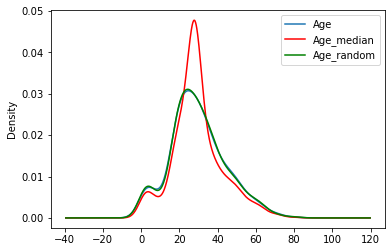

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde', ax=ax)

df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# age (blue) vs age_random (green) is almost falling on each other. 
#that means there is very less variance

# In this case, if I have to choose Mean/median or Random Sample imputation 
# I choose Random Sample as this has the most matching to the age 


##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

# Imputation of NaN with New Feature or Variable

This method works well if the data is not missing Completely at Random. MNAR

There is some relationship between data missing and other variable. 
- Ex: Women not revealing age.  "Age" and "Gender". Missing age values for the entries where gender being Female


In [29]:
df1=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [30]:
df1['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [31]:
df1.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values. We are not just deleting the entire column al together

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)
If there are 10 missing value columns, I need to create 10 more columns

In [32]:
df1.Age.median()

28.0

In [33]:
df1['Age'].fillna(df1.Age.median(),inplace=True)

In [37]:
df1.head(6)

#so whereever I see 1 in Age_NaN col, I replaced with median 
# I will also have the information(in new col)that that particular entry was NaN before I filled with median. 


,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1


# End of Distribution Imputation 

If there is suspicion that the missing value is not at random then capturing that information is important. 

In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable. (end of distribution)

We carry out this after filling out NaN values

In [42]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

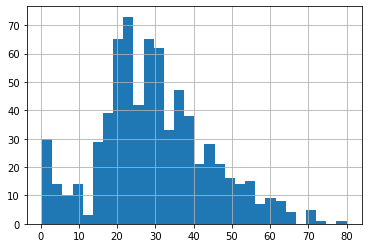

In [45]:
#checking end of ditribution 
df.Age.hist(bins=30)

#here Im using df only because all NaN values are replaced. 
#If I import df again with new df name and execute I will get sparse graph due to presence of NaN values. 



In [46]:
df.Age.mean()

#ccentral value of normal distribution 

29.69911764705882

In [56]:
# to get the end of distribution: I need to consider the distribution after 3rd standard deviation
extreme=df.Age.mean()+3*df.Age.std() 
extreme
# calculate std() of age and multipl by 3 which gives 3rd std deviation 
#even in graph, I can clearly see that the deviation is taken from 65-80, mean of this would be 73


73.27860964406095

#### Why we have taken just 3rd positive or extreme right quartile? 

As we can see in the boxplot we have just outliers in the right extreme. If we had in left extreme, we need to fetch those with multiplying by -3 and then replacing with another extreme we have calculated. 

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

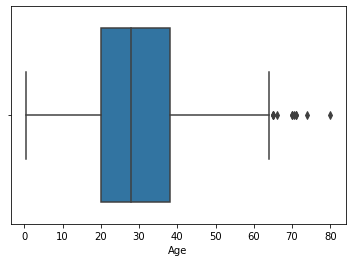

In [53]:
# to check outliers

sns.boxplot("Age", data= df)

# dots shown in right are outliers. age falls after 65 till 80

In [62]:
#creating function to impute the end of distribution NaN with extreme and rest of NaN with median 

def impute_nan(df, variable, median, extreme):
    df[variable +"_end_distribution"]= df[variable].fillna(extreme) #create new variable NaN with extreme
    #replace variable with median
    df[variable].fillna(median, inplace= True) # fill na with median. This is executed after we filled 
#end of ditribution by extreme value we calculated. This is for the rest of the missing variables.



In [63]:
impute_nan(df, "Age", df.median(), extreme)


In [64]:
df.head(20)

#17th row is replaced by extreme value 73. 

#here in Age column, we have not made any replacement in the fucntion we have created. we can do it. 

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,NaN,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

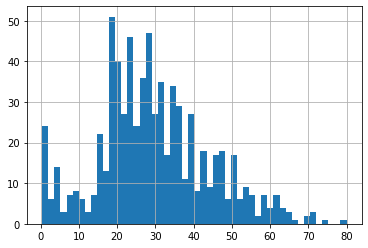

In [69]:
#to compare

df["Age"].hist(bins=50)

<AxesSubplot:>

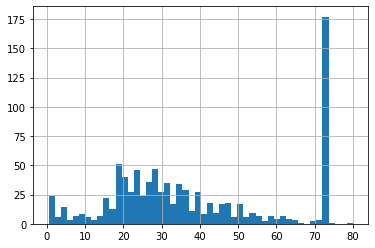

In [70]:
df["Age_end_distribution"].hist(bins=50)

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

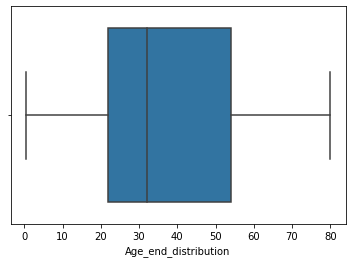

In [72]:
#to check whcih is better

sns.boxplot('Age_end_distribution', data=df)

#no outliers

#in some of scenarios, it may work than replacing it with median. 

# we need to check all these scenarios and their performance in feature engineering before feeding it to my model
